In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [83]:
data = pd.read_csv('dataset.csv')

In [84]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [85]:
data.shape

(1000, 10)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [87]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


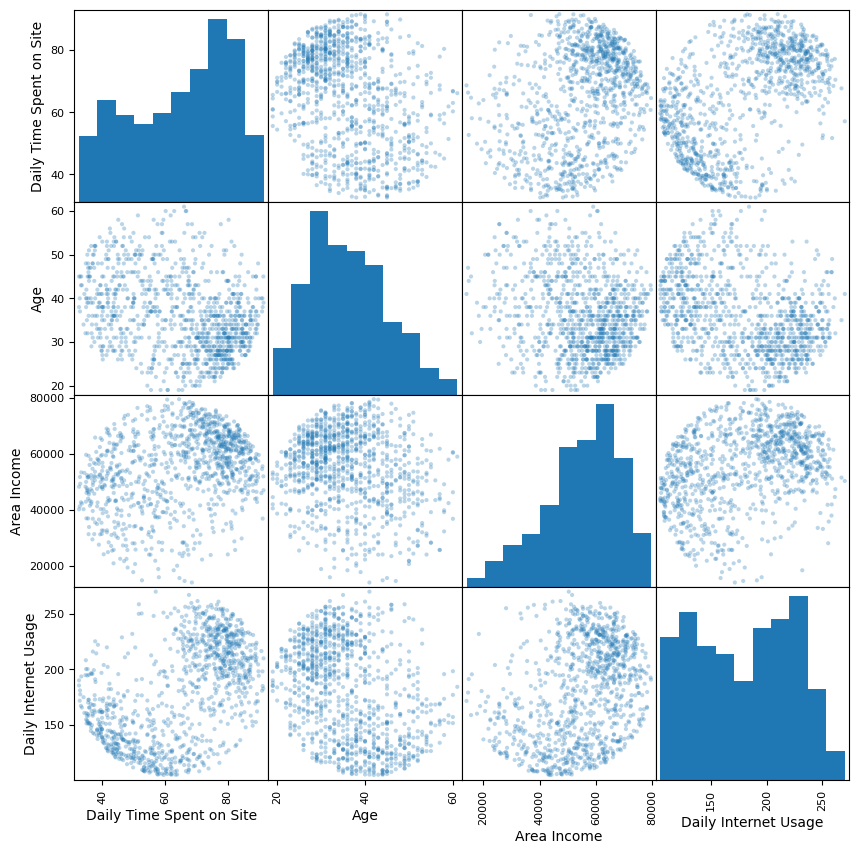

In [88]:
from pandas.plotting import scatter_matrix  
scatter_matrix(data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],  
 alpha=0.3, figsize=(10,10));


In [89]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20) 


col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [90]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)  



In [91]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of month'] = data['Timestamp'].dt.day
data['Day of week'] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour  
data = data.drop(['Timestamp'], axis=1)

data.head()  



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [92]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month',
       'Day of month', 'Day of week', 'Hour'],
      dtype='object')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',  
    'Male', 'Month', 'Day of month' ,'Day of week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [96]:
model1 = LogisticRegression(solver='lbfgs')
model1.fit(X_train, y_train)
predictions_LR = model1.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))


Logistic regression accuracy: 0.906060606060606

Confusion Matrix:
[[158  27]
 [  4 141]]


In [97]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
predictions_DT = model2.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))


Logistic regression accuracy: 0.906060606060606

Confusion Matrix:
[[158  27]
 [  4 141]]


In [102]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,11,3,21
996,51.30,45,67782.17,134.42,1,1,4,22,4,2
997,51.63,51,42415.72,120.37,1,1,2,1,0,17
998,55.55,19,41920.79,187.95,0,0,3,24,3,2


In [103]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,3.817000,15.484000,3.064000,11.660000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,1.926973,8.734073,1.998474,6.960952
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,2.000000,8.000000,1.000000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,4.000000,15.000000,3.000000,12.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,5.000000,23.000000,5.000000,18.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,7.000000,31.000000,6.000000,23.000000
